<a href="https://colab.research.google.com/github/ARahmankhn/PBAs_ML_dopant/blob/main/PBA_Dopant_ML_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#libraries for Materials science PBAs
!pip install matminer pymatgen scikit-learn shap xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 39.1 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=4354

In [2]:
from pymatgen.ext.matproj import MPRester

API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"
mpr = MPRester(API_KEY)

In [3]:
# Install mp-api package
!pip install mp-api

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.4/862.4 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 14.0 MB/s eta 0:00:00
   ━━

In [4]:
!pip install mp-api pymatgen pandas

In [5]:
api_key = '62RGSJmdRQGuJOOLsdvnmUBmqRep40yF'
mpr = MPRester(api_key)

In [6]:
from mp_api.client import MPRester
import pandas as pd

API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"

# Elements to include
target_elements = ["Na", "C", "N"]
dopants = ["Fe", "Mn", "Co", "Ni"]

results = []

with MPRester(API_KEY) as mpr:
    for dopant in dopants:
        elements = target_elements + [dopant]

        # Correct crystal system values (capitalized)
        docs = mpr.materials.summary.search(
            elements=elements,
            exclude_elements=["O"],
            crystal_system=["Cubic", "Monoclinic"],
            fields=["material_id", "formula_pretty", "energy_above_hull", "density", "band_gap"]
        )

        for doc in docs:
            doc_data = {
                "material_id": doc.material_id,
                "formula": doc.formula_pretty,
                "energy_above_hull": doc.energy_above_hull,
                "density": doc.density,
                "band_gap": doc.band_gap,
                "dopant": dopant
            }
            results.append(doc_data)

# Convert to DataFrame
df = pd.DataFrame(results)
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

,material_id,formula,energy_above_hull,density,band_gap,dopant
0,mp-541977,Cs2NaFe(CN)6,0.087319,2.556993,0.0000,Fe
1,mp-1180458,Na2FeCu(CN)6,0.416753,1.653601,0.6184,Fe
2,mp-505286,Rb2NaFe(CN)6,0.120225,2.220761,0.0000,Fe
3,mp-20915,Cs2NaMn(CN)6,0.110164,2.486641,0.0000,Mn
4,mp-505659,Rb2NaMn(CN)6,0.143357,2.166977,0.0000,Mn


In [7]:
from mp_api.client import MPRester
import pandas as pd

API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"

target_elements = ["Na", "C", "N"]
dopants = ["Fe", "Mn", "Co", "Ni"]

results = []

with MPRester(API_KEY) as mpr:
    for dopant in dopants:
        elements = target_elements + [dopant]

        docs = mpr.materials.summary.search(
            elements=elements,
            exclude_elements=["O"],
            crystal_system=["Cubic", "Monoclinic"],
            fields=[
                "material_id", "formula_pretty",
                "energy_above_hull", "structure"
            ]
        )

        for doc in docs:
            material_id = doc.material_id
            formula = doc.formula_pretty
            e_hull = doc.energy_above_hull
            structure = doc.structure

            # Placeholder logic for vacancy and water — refine later
            vacancy_ratio = 0.0  # Placeholder: You will estimate this from structure
            water_content = 0.0  # Placeholder: You can count H2O molecules later

            # Stability Score (simplified): 1 = stable, 0 = unstable
            stability_score = max(0.0, 1.0 - e_hull)  # Use a cutoff if needed

            results.append({
                "Material_ID": material_id,
                "Formula": formula,
                "Energy_Above_Hull": e_hull,
                "Vacancy_Ratio": vacancy_ratio,
                "Water_Content": water_content,
                "Stability_Score": stability_score,
                "M1_Dopant": dopant
            })

# Convert to DataFrame
df = pd.DataFrame(results)
df.head()


Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/2 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents: 0it [00:00, ?it/s]

,Material_ID,Formula,Energy_Above_Hull,Vacancy_Ratio,Water_Content,Stability_Score,M1_Dopant
0,mp-541977,Cs2NaFe(CN)6,0.087319,0.0,0.0,0.912681,Fe
1,mp-1180458,Na2FeCu(CN)6,0.416753,0.0,0.0,0.583247,Fe
2,mp-505286,Rb2NaFe(CN)6,0.120225,0.0,0.0,0.879775,Fe
3,mp-20915,Cs2NaMn(CN)6,0.110164,0.0,0.0,0.889836,Mn
4,mp-505659,Rb2NaMn(CN)6,0.143357,0.0,0.0,0.856643,Mn


In [8]:
!pip install pymatgen

In [9]:
# Install Python packages
!pip install matplotlib
!pip install matplotlib-venn
!pip install -U libarchive
!pip install pydot
!pip install cartopy

# Install system-level dependencies
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev
!apt-get -qq install -y graphviz

# Import the necessary libraries
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3  # Choose whichever you need
import pydot
import cartopy

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (libarchive)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 58.4 MB/s eta 0:00:00
E: Package 'libfluidsynth1' has no installation candidate
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.4_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.4) ...
Setting up libarchive-dev:amd64 (3.

In [10]:
from mp_api.client import MPRester
import pandas as pd

# Your Materials Project API key
API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"

material_ids = [
    "mp-541977",
    "mp-1180458",
    "mp-505286",
    "mp-20915",
    "mp-505659"
]

results = []

with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        material_ids=material_ids,
        fields=["material_id", "formula_pretty", "energy_above_hull", "structure"]
    )

    for doc in docs:
        structure = doc.structure
        formula = doc.formula_pretty
        material_id = doc.material_id
        e_hull = doc.energy_above_hull

        comp = structure.composition
        h_count = comp.get_atomic_fraction("H") * comp.num_atoms
        o_count = comp.get_atomic_fraction("O") * comp.num_atoms
        h2o_count = min(h_count // 2, o_count)

        # Placeholder for vacancy ratio — to be implemented
        vacancy_ratio = 0.0

        # Simple stability score
        stability_score = max(0.0, 1.0 - e_hull)

        results.append({
            "Material_ID": material_id,
            "Formula": formula,
            "Energy_Above_Hull": e_hull,
            "Water_Content": h2o_count,
            "Vacancy_Ratio": vacancy_ratio,
            "Stability_Score": stability_score
        })

# Convert to DataFrame
df = pd.DataFrame(results)
df.head()

Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

,Material_ID,Formula,Energy_Above_Hull,Water_Content,Vacancy_Ratio,Stability_Score
0,mp-541977,Cs2NaFe(CN)6,0.087319,0.0,0.0,0.912681
1,mp-505286,Rb2NaFe(CN)6,0.120225,0.0,0.0,0.879775
2,mp-20915,Cs2NaMn(CN)6,0.110164,0.0,0.0,0.889836
3,mp-1180458,Na2FeCu(CN)6,0.416753,0.0,0.0,0.583247
4,mp-505659,Rb2NaMn(CN)6,0.143357,0.0,0.0,0.856643


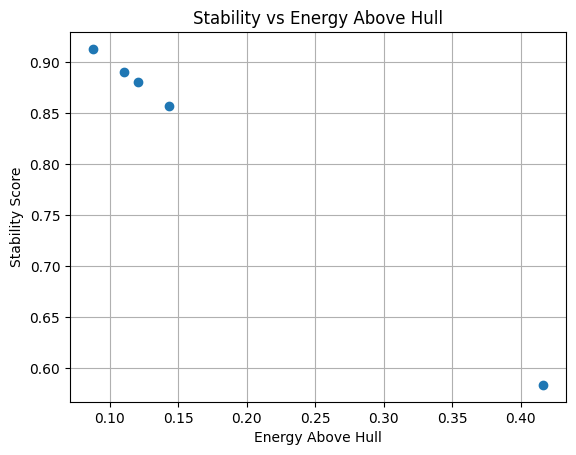

In [11]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.scatter(df['Energy_Above_Hull'], df['Stability_Score'])
plt.xlabel('Energy Above Hull')
plt.ylabel('Stability Score')
plt.title('Stability vs Energy Above Hull')
plt.grid(True)
plt.show()

In [12]:
df_sorted = df.sort_values(by='Stability_Score', ascending=False)
print(df_sorted.head())

  Material_ID       Formula  Energy_Above_Hull  Water_Content  Vacancy_Ratio  \
0   mp-541977  Cs2NaFe(CN)6           0.087319            0.0            0.0   
2    mp-20915  Cs2NaMn(CN)6           0.110164            0.0            0.0   
1   mp-505286  Rb2NaFe(CN)6           0.120225            0.0            0.0   
4   mp-505659  Rb2NaMn(CN)6           0.143357            0.0            0.0   
3  mp-1180458  Na2FeCu(CN)6           0.416753            0.0            0.0   

   Stability_Score  
0         0.912681  
2         0.889836  
1         0.879775  
4         0.856643  
3         0.583247  


In [13]:
most_stable = df[df['Stability_Score'] > 0.9]
print(most_stable)

  Material_ID       Formula  Energy_Above_Hull  Water_Content  Vacancy_Ratio  \
0   mp-541977  Cs2NaFe(CN)6           0.087319            0.0            0.0   

   Stability_Score  
0         0.912681  


In [14]:
from mp_api.client import MPRester
import pandas as pd

# Your Materials Project API key
API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"

material_ids = [
    "mp-541977",
    "mp-1180458",
    "mp-505286",
    "mp-20915",
    "mp-505659"
]

results = []

with MPRester(API_KEY) as mpr:
    docs = mpr.materials.summary.search(
        material_ids=material_ids,
        fields=["material_id", "formula_pretty", "energy_above_hull", "structure"]
    )

    for doc in docs:
        structure = doc.structure
        formula = doc.formula_pretty
        material_id = doc.material_id
        e_hull = doc.energy_above_hull

        comp = structure.composition
        h_count = comp.get_atomic_fraction("H") * comp.num_atoms
        o_count = comp.get_atomic_fraction("O") * comp.num_atoms
        h2o_count = min(h_count // 2, o_count)

        # Placeholder for vacancy ratio — to be implemented
        vacancy_ratio = 0.0

        # Simple stability score
        stability_score = max(0.0, 1.0 - e_hull)

        results.append({
            "Material_ID": material_id,
            "Formula": formula,
            "Energy_Above_Hull": e_hull,
            "Water_Content": h2o_count,
            "Vacancy_Ratio": vacancy_ratio,
            "Stability_Score": stability_score
        })

# Convert to DataFrame
df = pd.DataFrame(results)
df.head()


Retrieving SummaryDoc documents:   0%|          | 0/5 [00:00<?, ?it/s]

,Material_ID,Formula,Energy_Above_Hull,Water_Content,Vacancy_Ratio,Stability_Score
0,mp-1180458,Na2FeCu(CN)6,0.416753,0.0,0.0,0.583247
1,mp-20915,Cs2NaMn(CN)6,0.110164,0.0,0.0,0.889836
2,mp-505286,Rb2NaFe(CN)6,0.120225,0.0,0.0,0.879775
3,mp-541977,Cs2NaFe(CN)6,0.087319,0.0,0.0,0.912681
4,mp-505659,Rb2NaMn(CN)6,0.143357,0.0,0.0,0.856643


In [15]:
!pip install mp-api pymatgen nglview

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 53.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [16]:
from google.colab import output
output.enable_custom_widget_manager()

In [17]:
!pip install notebook --upgrade
!pip install nglview

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 71, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/index_command.py", line 100, in _build_session
    session = 

In [6]:
!pip install mp-api pymatgen py3Dmol
!pip install py3Dmol
import py3Dmol
from pymatgen.core import Structure

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.1/217.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.6/122.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 862.4/862.4 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 9.9 MB/s eta 0:00:00
   ━━

In [2]:
from mp_api.client import MPRester
from pymatgen.io.cif import CifWriter
import py3Dmol

# Your Materials Project API key
API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"

# List of PBA Material IDs
material_ids = [
    "mp-541977",   # Cs2NaFe(CN)6
    "mp-1180458",  # Na2FeCu(CN)6
    "mp-505286",   # Rb2NaFe(CN)6
    "mp-20915",    # Cs2NaMn(CN)6
    "mp-505659"    # Rb2NaMn(CN)6
]

# Start session and visualize
with MPRester(API_KEY) as mpr:
    for mat_id in material_ids:
        # Fetch structure and info
        doc = mpr.materials.summary.get_data_by_id(mat_id)
        structure = doc.structure
        formula = doc.formula_pretty

        print(f"\n🔬 Showing structure for: {formula} ({mat_id})")

        # Convert to CIF string
        cif_str = CifWriter(structure).__str__()

        # Create 3D view
        view = py3Dmol.view(width=400, height=400)
        view.addModel(cif_str, 'cif')
        view.setStyle({'stick': {}})
        view.addUnitCell()
        view.zoomTo()
        view.show()


<ipython-input-2-28c48c844f05>:21: DeprecationWarning: get_data_by_id is deprecated and will be removed soon. Please use the search method instead.
  doc = mpr.materials.summary.get_data_by_id(mat_id)


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]


🔬 Showing structure for: Cs2NaFe(CN)6 (mp-541977)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]


🔬 Showing structure for: Na2FeCu(CN)6 (mp-1180458)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]


🔬 Showing structure for: Rb2NaFe(CN)6 (mp-505286)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]


🔬 Showing structure for: Cs2NaMn(CN)6 (mp-20915)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]


🔬 Showing structure for: Rb2NaMn(CN)6 (mp-505659)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [3]:
from mp_api.client import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.analysis.structure_analyzer import SpacegroupAnalyzer
import pandas as pd

API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"

material_ids = [
    "mp-541977",   # Cs2NaFe(CN)6
    "mp-1180458",  # Na2FeCu(CN)6
    "mp-505286",   # Rb2NaFe(CN)6
    "mp-20915",    # Cs2NaMn(CN)6
    "mp-505659"    # Rb2NaMn(CN)6
]

results = []

with MPRester(API_KEY) as mpr:
    for mat_id in material_ids:
        doc = mpr.materials.summary.get_data_by_id(mat_id)
        structure = doc.structure
        formula = doc.formula_pretty
        material_id = doc.material_id
        density = doc.density
        volume = structure.volume

        # Save CIF file
        cif_file = f"{material_id}_{formula}.cif".replace("/", "-")
        structure.to(fmt="cif", filename=cif_file)

        # Symmetry & lattice
        sga = SpacegroupAnalyzer(structure)
        spacegroup = sga.get_space_group_symbol()
        crystal_system = sga.get_crystal_system()
        lattice = structure.lattice

        results.append({
            "Material_ID": material_id,
            "Formula": formula,
            "Density": density,
            "Volume": volume,
            "a": lattice.a,
            "b": lattice.b,
            "c": lattice.c,
            "alpha": lattice.alpha,
            "beta": lattice.beta,
            "gamma": lattice.gamma,
            "Spacegroup": spacegroup,
            "Crystal_System": crystal_system
        })
df_props = pd.DataFrame(results)
df_props.head()

<ipython-input-3-a76c66fbf873>:20: DeprecationWarning: get_data_by_id is deprecated and will be removed soon. Please use the search method instead.
  doc = mpr.materials.summary.get_data_by_id(mat_id)


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

,Material_ID,Formula,Density,Volume,a,b,c,alpha,beta,gamma,Spacegroup,Crystal_System
0,mp-541977,Cs2NaFe(CN)6,2.556993,650.385091,7.780509,7.628237,13.344693,55.201466,90.000000,90.0,P2_1/c,monoclinic
1,mp-1180458,Na2FeCu(CN)6,1.653601,322.823821,7.876801,5.838293,7.468756,90.000000,109.965279,90.0,P2/m,monoclinic
2,mp-505286,Rb2NaFe(CN)6,2.220761,606.972982,7.784924,7.321932,12.878450,55.776305,90.000000,90.0,P2_1/c,monoclinic
3,mp-20915,Cs2NaMn(CN)6,2.486641,667.574469,7.914722,7.638891,13.404338,55.460612,90.000000,90.0,P2_1/c,monoclinic
4,mp-505659,Rb2NaMn(CN)6,2.166977,620.647813,7.867507,7.332792,12.939060,56.247948,90.000000,90.0,P2_1/c,monoclinic


In [4]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [5]:
from google.colab import output
output.disable_custom_widget_manager()

In [4]:
!pip install matminer
!pip install matminer pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.0/809.0 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 38.5 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=4354

In [7]:
 from matminer.featurizers.structure import DensityFeatures, GlobalSymmetryFeatures, RadialDistributionFunction
from mp_api.client import MPRester
import pandas as pd

API_KEY = "62RGSJmdRQGuJOOLsdvnmUBmqRep40yF"

material_ids = [
    "mp-541977", "mp-1180458", "mp-505286", "mp-20915", "mp-505659"
]

results = []

with MPRester(API_KEY) as mpr:
    for mat_id in material_ids:
        doc = mpr.materials.summary.get_data_by_id(mat_id)
        structure = doc.structure
        density = doc.density
        volume = structure.volume
        lattice = structure.lattice

        results.append({
            "Material_ID": mat_id,
            "Formula": doc.formula_pretty,
            "Density": density,
            "Volume": volume,
            "a": lattice.a,
            "b": lattice.b,
            "c": lattice.c,
            "alpha": lattice.alpha,
            "beta": lattice.beta,
            "gamma": lattice.gamma,
            "structure": structure
        })

df = pd.DataFrame(results)

# Apply Matminer featurizers
featurizers = [
    DensityFeatures(),
    GlobalSymmetryFeatures(),
    RadialDistributionFunction()
]

for f in featurizers:
    print(f"Applying: {f.__class__.__name__}")
    df = f.featurize_dataframe(df, "structure", ignore_errors=True)

# Drop structure column if exporting to CSV
df.drop(columns=["structure"], inplace=True)

df.head()


<ipython-input-7-d5b67bce1488>:15: DeprecationWarning: get_data_by_id is deprecated and will be removed soon. Please use the search method instead.
  doc = mpr.materials.summary.get_data_by_id(mat_id)


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Applying: DensityFeatures


DensityFeatures:   0%|          | 0/5 [00:00<?, ?it/s]

Applying: GlobalSymmetryFeatures


GlobalSymmetryFeatures:   0%|          | 0/5 [00:00<?, ?it/s]

Applying: RadialDistributionFunction


RadialDistributionFunction:   0%|          | 0/5 [00:00<?, ?it/s]

,Material_ID,Formula,Density,Volume,a,b,c,alpha,beta,gamma,...,rdf [19.00000 - 19.10000]A,rdf [19.10000 - 19.20000]A,rdf [19.20000 - 19.30000]A,rdf [19.30000 - 19.40000]A,rdf [19.40000 - 19.50000]A,rdf [19.50000 - 19.60000]A,rdf [19.60000 - 19.70000]A,rdf [19.70000 - 19.80000]A,rdf [19.80000 - 19.90000]A,rdf [19.90000 - 20.00000]A
0,mp-541977,Cs2NaFe(CN)6,2.556993,650.385091,7.780509,7.628237,13.344693,55.201466,90.000000,90.0,...,34.941041,31.225216,29.155786,32.829285,29.414333,35.884931,38.536522,34.830114,38.420644,32.509779
1,mp-1180458,Na2FeCu(CN)6,1.653601,322.823821,7.876801,5.838293,7.468756,90.000000,109.965279,90.0,...,18.582069,14.710806,21.577575,10.634682,18.844236,13.946953,21.123865,17.123555,15.321512,19.525150
2,mp-505286,Rb2NaFe(CN)6,2.220761,606.972982,7.784924,7.321932,12.878450,55.776305,90.000000,90.0,...,31.444186,32.104475,29.490738,37.249340,30.962147,30.962150,33.306045,37.922806,31.412422,30.491505
3,mp-20915,Cs2NaMn(CN)6,2.486641,667.574469,7.914722,7.638891,13.404338,55.460612,90.000000,90.0,...,28.545228,26.799275,34.585554,37.421347,32.824741,29.709922,31.644020,34.729210,33.874585,34.203222
4,mp-505659,Rb2NaMn(CN)6,2.166977,620.647813,7.867507,7.332792,12.939060,56.247948,90.000000,90.0,...,39.127514,31.817690,28.489121,30.174047,36.229153,32.790417,29.579516,37.985819,27.732991,36.142200


In [8]:
# prompt: export this table into csv and download

file_name = 'pba_data.csv'
df.to_csv(file_name, index=False)

from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>